Import file

In [2]:
import pandas as pd
import math
import numpy as np; np.random.seed(1)

df = pd.read_csv('auto trader yaris nw.csv')

prices = df['price']
miles = df['miles']
reg = df['Reg']
ps = df['PS']
year = [math.nan if not(isinstance(x, str)) else int(x[0:4]) for x in reg]
cs = np.array(year)


Create Scatter

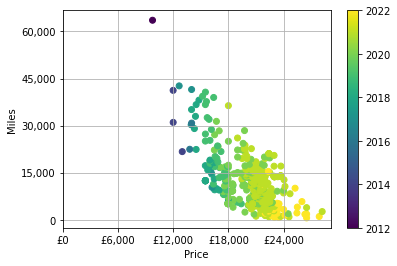

In [3]:
%matplotlib widget
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
sc = plt.scatter(prices,miles, c=cs, cmap='viridis')
plt.xticks(np.arange(0, max(prices)+1, 2000))
plt.xlabel("Price")
plt.yticks(np.arange(0, max(miles)+1, 1000))
plt.ylabel("Miles")
plt.colorbar()
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.xaxis.set_major_formatter('£{x:,.0f}')
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_formatter('{x:,.0f}')
ax.grid(True)


Add interactive annotation

In [4]:
import mplcursors

cursor = mplcursors.cursor(sc, hover=True)
@cursor.connect("add")
def on_add(sel):
    sel.annotation.set(text="£{:,}".format(prices[sel.index]) + " " + "Miles: {:,}".format(miles[sel.index]) + " " + reg[sel.index])

plt.show()